# < 1주차 과제 >
과제 목표 및 의의 <br>
- 파이토치의 기본 연산 단위인 텐서 (tensor)에 대해 알아보고, 파이토치와 친숙해진다.
- 주어진 데이터셋에 대하여 linear regression을 수행하며  최적의 파라미터값을 탐색한다.
- 이를 통해, 차후 배우게 될 deep neural network의 학습 과정에 대해서 전반적인 이해를 얻을 수 있다.

##1. 파이토치 시작하기

In [ ]:
import torch 
import numpy as np

###텐서란 무엇인가?

배열(array)은 번호(index)와 각 번호에 대응하는 값들로 이루어진 데이터 형태를 의미한다.numpy의 array 혹은 pandas를 다루어보았다면 리스트나, 행렬 등이 배열의 대표적인 예시가 되겠다. <br>

텐서(tensor)는 배열(array)이나 행렬(matrix)과 같이, 다차원 배열의 통칭을 의미한다. 쉽게 말해서, 텐서(tensor)는 PyTorch의 기본적인 data structure이다.<br>

1) 텐서 생성 <br>
2) 텐서 연산 <br>
3) 텐서의 대표적 속성 <br>
- GPU 연산
- 자동 미분 (requires_grad = True)


#### 1) 텐서 생성하기 
- 직접 생성하기

In [ ]:
data = [[1,2],[3,4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

- numpy 배열로부터 생성하기

In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

- 다른 텐서로부터 생성하기

In [ ]:
x_ones = torch.ones_like(x_data)
print(f'Ones Tensor: {x_ones} \n')
x_rand = torch.rand_like(x_data,dtype=torch.float)
print(f'Random Tensor: {x_rand}')

Ones Tensor: tensor([[1, 1],
        [1, 1]]) 

Random Tensor: tensor([[0.8342, 0.2986],
        [0.7045, 0.3109]])


- 무작위 (random) 또는 상수(constant)값을 사용하기 <br><br>
shape은 텐서의 차원을 나타내는 튜플로, 아래의 함수에서 출력 텐서의 차원을 결정한다.

In [ ]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f'Random Tensor: {rand_tensor} \n')
print(f'Ones Tensor: {ones_tensor} \n')
print(f'Zeros Tensor: {zeros_tensor} \n')

Random Tensor: tensor([[0.1495, 0.9417, 0.6625],
        [0.9853, 0.8580, 0.8566]]) 

Ones Tensor: tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



#### 2) 텐서 연산하기

- numpy식의 표준 인덱싱과 슬라이싱

In [ ]:
tensor = torch.ones(4,4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


- 텐서 합치기 (torch.cat)

In [ ]:
t1 = torch.cat([tensor,tensor,tensor],dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [ ]:
t3 = torch.cat([tensor,tensor,tensor],dim=0)
print(t3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


- 텐서 합치기 (torch.stack)

In [ ]:
t2 = torch.stack([tensor,tensor,tensor],dim=1)
print(t2)

tensor([[[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]]])


In [ ]:
t4 = torch.stack([tensor,tensor,tensor],dim=1)
print(t4)

tensor([[[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]]])


In [ ]:
t2.size()

torch.Size([4, 3, 4])

In [ ]:
t4.size()

torch.Size([4, 3, 4])

torch.cat과 torch.stack은 무엇이 다른가?
https://discuss.pytorch.kr/t/torch-cat-torch-stack/26

- 텐서 곱하기 (element-wise product)

In [ ]:
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# 다른 문법:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


- 텐서 곱하기 (matrix multiplication)

In [ ]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# 다른 문법:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


#### 3) 텐서의 대표적 특성 (3가지)

##### a) broadcasting
두 개의 행렬을 연산(덧셈,뺄셈)하기 위해서는 크기가 같아야 한다. PyTorch의 텐서(tensor)는 크기가 다른 텐서 간에도 연산이 가능하게 하는데, 자동으로 크기를 맞춰서 연산을 수행하게 만드는 기능을 broadcasting이라고 한다.

In [ ]:
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1 + m2)

tensor([[5., 5.]])


In [ ]:
# Vector + scalar
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([3]) # [3] -> [3, 3]
print(m1 + m2)

tensor([[4., 5.]])


In [ ]:
# 2 x 1 Vector + 1 x 2 Vector
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([[3], [4]])
print(m1 + m2)

tensor([[4., 5.],
        [5., 6.]])


##### b) PyTorch tensor를 GPU에 올리기 <br>
딥러닝의 특성상 계산량이 많아 보통 GPU에서 계산을 하는 경우가 많다. numpy와 다르게, PyTorch의 tensor는 GPU 상에 data structure를 올릴 수 있는데, 이는 빠른 연산이 가능하게 한다.

- device : 해당 tensor가 CPU,GPU 중 어디에 있는지 확인할 때 사용 <br>
- cuda.is_available() : GPU(cuda)를 사용할 수 있는지 확인할 때 사용<br>
- to('cuda') : tensor를 GPU에 올릴 때 사용
- to('cpu') : tensor를 다시 CPU에서 계산할 때 사용

In [ ]:
a = torch.tensor([1,2,3,4])
print(a.device)

cpu


In [ ]:
a = torch.tensor([1,2,3,4],device='cuda:0')
print(a.device)

cuda:0


In [ ]:
b = a.to('cpu')
print(b.device)

cpu


- 종합하기 예제 1

In [ ]:
a = torch.tensor([1,2,3,4])
if torch.cuda.is_available():
  device='cuda'
else:
  device='cpu'
a = a.to(device)
print(a.device)

cuda:0


- 종합하기 예제 2

In [ ]:
a = torch.tensor([1,2,3,4])
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
a = a.to(device)
print(a.device)

cuda:0


##### c) 자동미분 (Autograd)
Autograd는 tensor에 대한 미분 계산을 도와주는 pytorch 패키지이다. 다음주에 배우게 될 오차역전파 등 모델 학습시 업데이트 되는 파라미터에 대한 gradient값을 계산하고 저장하는데 사용된다. 가장 핵심적인 패키지임을 알아두자.


- requires_grad : True로 설정 시 모든 연산들을 기억 (tensor가 감싸고 있는 값들은 int가 아닌 float 자료형이어야 함!)
- retain_grad() : 해당 변수에 대한 gradient 연산 기억
- backward() : 기억한 연산들에 대해서 gradient 계산
- detach() : 계산 정보를 더 이상 기억하지 않음

In [ ]:
w = torch.tensor([[1.,2.],[3.,2.]],requires_grad=True)
print(w)

tensor([[1., 2.],
        [3., 2.]], requires_grad=True)


In [ ]:
x = w**3
print(x)

tensor([[ 1.,  8.],
        [27.,  8.]], grad_fn=<PowBackward0>)


- autograd.Variable은 autograd 패키지의 핵심 클래스입니다. Variable 클래스는 Tensor를 감싸고 있으며, Tensor에 정의된 거의 모든 연산을 지원합니다. 모든 계산을 마친 후에 .backward()를 호출하면, 자동으로 모든 기울기가 계산됩니다.

- Variable 객체의 .data 속성으로 Tensor의 실제 데이터에 접근할 수 있습니다. 
- Variable에 대한 기울기는 .grad 속성에 저장됩니다.
- 각 Variable 객체에는 .grad_fn 속성이 있습니다. 이 속성은 해당 Variable 객체를 생성하는 Function 객체를 참조합니다. (예외 상황, Variable을 사용자가 직접 생성한 경우에는 grad_fn이 값은 None입니다.)

In [ ]:
y = x+3
print(y)

tensor([[ 4., 11.],
        [30., 11.]], grad_fn=<AddBackward0>)


In [ ]:
z = y.mean()
print(z)

tensor(14., grad_fn=<MeanBackward0>)


backward를 호출하면 intermediate variables의 grad는 모두 삭제가 되기 때문에 requires_grad_를 적용해주어도 backward 후에 grad 속성을 보면 None값을 보게 됨. (leaf node인 경우에만 grad 추적이 되도록 default 설정해둠 in torch)

In [ ]:
x.retain_grad()
y.retain_grad()

In [ ]:
z.backward()
print(y.grad)

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])


In [ ]:
print(w.grad)

tensor([[0.7500, 3.0000],
        [6.7500, 3.0000]])


- 자동 미분 심화 : https://teamdable.github.io/techblog/PyTorch-Autograd

#### 4) 직접해보기 (do-it!)

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두개 만들고 행으로 병합, 열로 병합


In [ ]:
X=torch.rand(4,3)
Y=torch.rand(4,3)
print(torch.cat([X,Y],dim=0))
print(torch.cat([X,Y],dim=1))

tensor([[0.6810, 0.5414, 0.2096],
        [0.5656, 0.1758, 0.5661],
        [0.6370, 0.1959, 0.4474],
        [0.3392, 0.5539, 0.8676],
        [0.8691, 0.8893, 0.2378],
        [0.8441, 0.2747, 0.4190],
        [0.2290, 0.2649, 0.7249],
        [0.9113, 0.2926, 0.5488]])
tensor([[0.6810, 0.5414, 0.2096, 0.8691, 0.8893, 0.2378],
        [0.5656, 0.1758, 0.5661, 0.8441, 0.2747, 0.4190],
        [0.6370, 0.1959, 0.4474, 0.2290, 0.2649, 0.7249],
        [0.3392, 0.5539, 0.8676, 0.9113, 0.2926, 0.5488]])


## 2. linear regression implementation from scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [ ]:
!pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib_inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import random
import torch
from d2l import torch as d2l
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, size = (num_examples, len(w))) #torch.normal(mean,std,size=(numexaples,len(w)):출력텐서)
    y = torch.matmul(X, w) + b #matmul : 인수의 종류에 따라서 자동으로 dot(벡터 내적), mv(행렬과 벡터의 곱), mm(행렬과 행렬의 곱)을 선택
    y += torch.normal(0, 0.01, y.shape) #noise에 해당
    return X, y.reshape((-1, 1)) 
  # reshape(정수,정수)는 reshape(정수행, 정수열)의 2차원 배열로 변형해줌. -1의 의미는 열의자리를 1로 만들고 나서 남은 배열의 길이와 남는 차원으로부터 추정하여 자동으로 행의 크기를 지정하라는 의미

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [ ]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-1.2783,  1.5687]) 
label: tensor([-0.7009])


In [ ]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        ##이하는 반복문에 대한 조건입니다.
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

# 사용자 정의 함수에서 return이 아닌 yield를 사용하면 제너레이터(generator)를 반환함
# 제너레이터(generator) : 여러개의 데이터를 미리 만들어 놓지 않고 필요할 때마다 즉석에서 하나씩 만들어내는 객체
# 메모리 효율 측면에서 yield가 더욱 효율적
# return : 모든 결과값을 메모리에 올려놓아야 하는 반면, yield : 결과값을 하나씩 메모리에 올려놓음

In [ ]:
batch_size = 20

# 하나의 배치만 출력하기 위해 break 사용

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.0156, -0.3412],
        [ 0.5980, -0.2146],
        [ 0.8208, -1.6737],
        [-1.1846, -0.4930],
        [-0.0474, -0.0942],
        [-1.0232,  0.3156],
        [-0.8673,  0.0394],
        [ 0.3286,  0.8745],
        [-1.7954,  0.1299],
        [-0.0303,  0.4451],
        [-1.6694, -0.2106],
        [-1.1061, -0.1325],
        [-1.2444, -1.0910],
        [ 0.6766, -0.6749],
        [ 0.2739,  0.2997],
        [ 1.5639,  0.1968],
        [ 0.7694,  0.5581],
        [ 0.7339, -1.1372],
        [ 0.4196,  1.0625],
        [-0.6626,  1.2645]]) 
 tensor([[ 5.9732],
        [ 7.6182],
        [10.4720],
        [ 2.6920],
        [ 5.5053],
        [ 1.9624],
        [ 2.8280],
        [ 5.1553],
        [-0.0742],
        [ 4.7387],
        [ 0.7905],
        [ 2.3868],
        [ 3.4094],
        [ 8.5487],
        [ 5.8719],
        [ 9.8962],
        [ 6.9681],
        [ 9.4058],
        [ 5.1592],
        [ 1.6356]])


In [ ]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([5.5])

In [ ]:
print(w)

tensor([[0.0095],
        [0.0166]], requires_grad=True)


In [ ]:
print(b)

tensor([5.5000])


In [ ]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X,w) + b

In [ ]:
def squared_loss(y_hat, y):  
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [ ]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
          param -= lr * param.grad / batch_size
          param.grad.zero_() 
          
          # w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
          # requires_grad = True로 지정할 시, 텐서에 가해진 모든 연산을 추적하기 때문에
          # 역전파가 진행될 때 마다 (= 1epoch마다) 텐서의 그래디언트가 .grad 속성에 누적됨.
          # 따라서, 각 epoch마다 파라미터를 업데이트하기 위하여 필요한 gradient를 구하기 위해서는 누적된 값을 0으로 초기화 해주는 것이 필요.
          

In [ ]:
lr = 0.001
num_epochs = 30
net = linreg
loss = squared_loss

w0 = []
w1 = []
b_l = []
loss_arr_w0 = []
loss_arr_w1 = []

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X , w, b), y) 
        # Compute gradient on `l` with respect to [`w`]
        l.sum().backward()
        sgd([w], lr, batch_size) # update 파라미터에서 b 제외
    with torch.no_grad(): 
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
# torch.no_grad() : requires_grad = False로 전환하여 autograd를 끄는 코드
# 쉽게 말해서, 더 이상 파라미터에 대한 학습이 진행이 안되며, 학습이 완료된 모델의 성능을 보기 위한 것이다.      
        w0.append(w.tolist()[0])
        w1.append(w.tolist()[1])
        b_l.append(b.tolist())
        loss_arr_w0.append(train_l[0].mean())
        loss_arr_w1.append(train_l[1].mean())

epoch 1, loss 4.691210
epoch 2, loss 3.821475
epoch 3, loss 3.113021
epoch 4, loss 2.535930
epoch 5, loss 2.065830
epoch 6, loss 1.682893
epoch 7, loss 1.370947
epoch 8, loss 1.116838
epoch 9, loss 0.909838
epoch 10, loss 0.741208
epoch 11, loss 0.603842
epoch 12, loss 0.491938
epoch 13, loss 0.400776
epoch 14, loss 0.326513
epoch 15, loss 0.266014
epoch 16, loss 0.216729
epoch 17, loss 0.176576
epoch 18, loss 0.143866
epoch 19, loss 0.117219
epoch 20, loss 0.095509
epoch 21, loss 0.077822
epoch 22, loss 0.063413
epoch 23, loss 0.051674
epoch 24, loss 0.042110
epoch 25, loss 0.034317
epoch 26, loss 0.027969
epoch 27, loss 0.022797
epoch 28, loss 0.018584
epoch 29, loss 0.015151
epoch 30, loss 0.012354


In [ ]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.1413, -0.0643], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.])


In [ ]:
print(loss_arr_w0)

[tensor(15.7198), tensor(12.7966), tensor(10.4176), tensor(8.4814), tensor(6.9055), tensor(5.6229), tensor(4.5789), tensor(3.7291), tensor(3.0373), tensor(2.4742), tensor(2.0157), tensor(1.6424), tensor(1.3384), tensor(1.0909), tensor(0.8894), tensor(0.7252), tensor(0.5915), tensor(0.4825), tensor(0.3937), tensor(0.3214), tensor(0.2625), tensor(0.2144), tensor(0.1752), tensor(0.1433), tensor(0.1172), tensor(0.0959), tensor(0.0786), tensor(0.0644), tensor(0.0528), tensor(0.0433)]


In [ ]:
w0

[[0.29897379875183105],
 [0.5604188442230225],
 [0.7965394854545593],
 [1.0098017454147339],
 [1.2024235725402832],
 [1.3763984441757202],
 [1.5335302352905273],
 [1.6754497289657593],
 [1.8036285638809204],
 [1.9194036722183228],
 [2.023970603942871],
 [2.1184158325195312],
 [2.203718900680542],
 [2.2807652950286865],
 [2.3503494262695312],
 [2.413201332092285],
 [2.469973087310791],
 [2.521247625350952],
 [2.5675578117370605],
 [2.6093873977661133],
 [2.6471707820892334],
 [2.681295871734619],
 [2.7121176719665527],
 [2.7399566173553467],
 [2.7651028633117676],
 [2.787814140319824],
 [2.808326005935669],
 [2.8268537521362305],
 [2.8435890674591064],
 [2.858703374862671]]

In [ ]:
loss_arr_w1

[tensor(23.6382),
 tensor(19.2385),
 tensor(15.6574),
 tensor(12.7427),
 tensor(10.3702),
 tensor(8.4393),
 tensor(6.8676),
 tensor(5.5884),
 tensor(4.5474),
 tensor(3.7000),
 tensor(3.0105),
 tensor(2.4493),
 tensor(1.9926),
 tensor(1.6209),
 tensor(1.3185),
 tensor(1.0724),
 tensor(0.8721),
 tensor(0.7092),
 tensor(0.5767),
 tensor(0.4688),
 tensor(0.3811),
 tensor(0.3097),
 tensor(0.2517),
 tensor(0.2045),
 tensor(0.1661),
 tensor(0.1349),
 tensor(0.1095),
 tensor(0.0888),
 tensor(0.0721),
 tensor(0.0585)]

In [ ]:
w1

[[-0.1349237561225891],
 [-0.27129027247428894],
 [-0.3940569758415222],
 [-0.504560649394989],
 [-0.6040279269218445],
 [-0.693556010723114],
 [-0.7741518616676331],
 [-0.8466944098472595],
 [-0.9119946956634521],
 [-0.9707707166671753],
 [-1.0236696004867554],
 [-1.0712871551513672],
 [-1.1141481399536133],
 [-1.152722954750061],
 [-1.1874518394470215],
 [-1.2187038660049438],
 [-1.246835470199585],
 [-1.2721526622772217],
 [-1.2949416637420654],
 [-1.315450668334961],
 [-1.3339076042175293],
 [-1.3505220413208008],
 [-1.3654744625091553],
 [-1.3789349794387817],
 [-1.3910483121871948],
 [-1.4019496440887451],
 [-1.4117622375488281],
 [-1.4205918312072754],
 [-1.42853844165802],
 [-1.43569016456604]]

In [ ]:
b_l

[[5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5],
 [5.5]]

+cost graph 그리기 (x축 w, y축 loss)

In [ ]:
!pip install matplotlib==3.1.3
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 45.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
d2l 0.17.6 requires matplotlib==3.5.1, but you have matplotlib 3.1.3 which is incompatible.


Text(0, 0.5, 'loss')

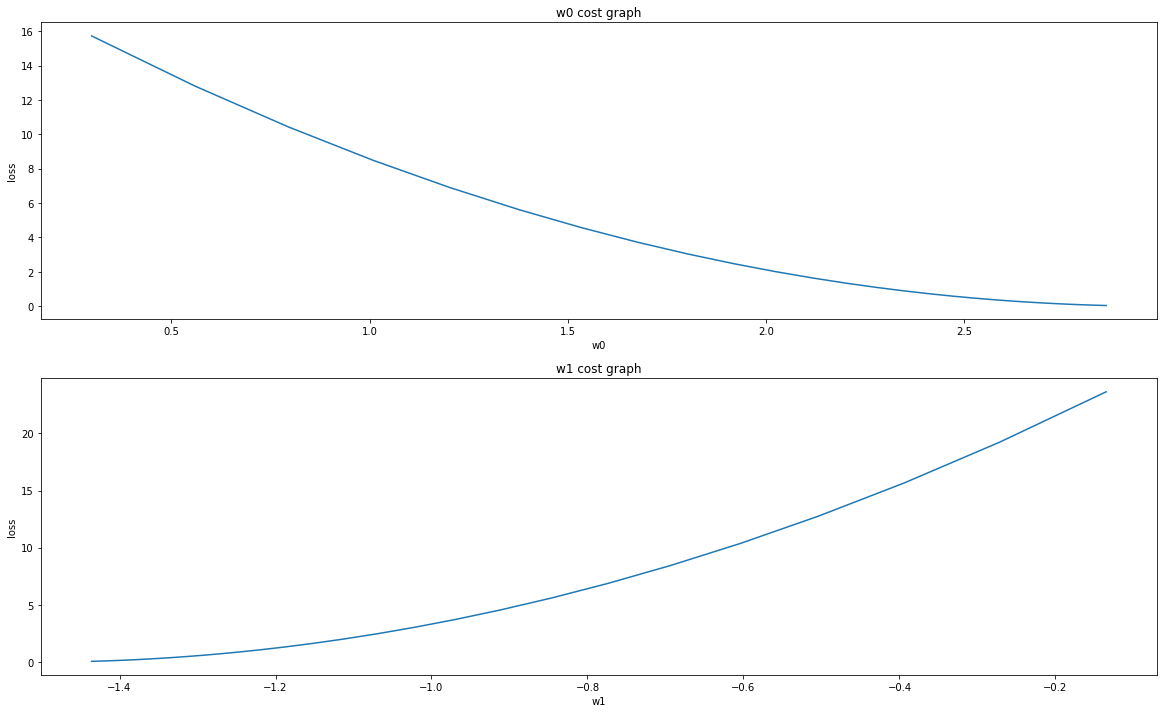

In [ ]:
plt.figure(figsize=(20,12))

plt.subplot(2,1,1)
plt.plot(w0,loss_arr_w0)
plt.title('w0 cost graph')
plt.xlabel('w0')
plt.ylabel('loss')

plt.subplot(2,1,2)
plt.plot(w1,loss_arr_w1)
plt.title('w1 cost graph')
plt.xlabel('w1')
plt.ylabel('loss')


## 3. concise implementation of linear regression 
- api 사용해보기

In [ ]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l


true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [ ]:
def load_array(data_arrays, batch_size, is_train=True): 
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [ ]:
next(iter(data_iter))

[tensor([[-1.2129,  0.1416],
         [ 0.4793,  0.4309],
         [ 0.6451, -0.5750],
         [ 2.3001,  0.8469],
         [-0.3072,  0.6027],
         [-0.2659,  1.0970],
         [-0.2418, -0.5315],
         [ 0.3280, -0.2320],
         [-1.7030,  0.2996],
         [-1.3387,  0.1389],
         [-0.5182,  0.4293],
         [ 0.3955, -2.6030],
         [ 0.7623, -0.9677],
         [ 0.5867,  1.0423],
         [ 0.0912,  1.1758],
         [-1.0786, -0.1452],
         [-1.0269,  1.7748],
         [-1.8872,  0.2158],
         [-1.0624,  0.0465],
         [-1.2340,  0.9716]]), tensor([[ 1.6338],
         [ 6.2974],
         [ 8.2983],
         [11.1246],
         [ 3.6847],
         [ 3.0557],
         [ 5.5741],
         [ 6.8218],
         [-0.0425],
         [ 1.2662],
         [ 3.3132],
         [10.5843],
         [ 9.2289],
         [ 5.7031],
         [ 4.0026],
         [ 2.4900],
         [-0.2242],
         [-0.4781],
         [ 2.2433],
         [ 0.3174]])]

In [ ]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1))

In [ ]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [ ]:
loss = nn.MSELoss() #L1도 가능

In [ ]:
import torch.optim as optim
trainer = optim.SGD(net.parameters(),lr=0.01)

In [ ]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
      l = loss(net(X),y)
      trainer.zero_grad()
      l.backward()
      trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.722902
epoch 2, loss 0.012629
epoch 3, loss 0.000310


In [ ]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([ 0.0071, -0.0032])
error in estimating b: tensor([0.0125])
